In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Load both CSV files into DataFrames.
dc_superheroes = pd.read_csv('dc-wikia-data.csv')
mcu_superheroes = pd.read_csv('marvel-wikia-data.csv')

# Data Loading & Inspection

In [3]:
dc_superheroes.sample(5)
mcu_superheroes.sample(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
11315,510090,Lorelei Riciardi (Earth-616),\/Lorelei_Riciardi_(Earth-616),Public Identity,Bad Characters,NaN,Brown Hair,Female Characters,NaN,Living Characters,1.0,Jun-45,1945.0
8013,454679,Carrie (Earth-616),\/Carrie_(Earth-616),Secret Identity,Good Characters,Green Eyes,Grey Hair,Female Characters,NaN,Living Characters,3.0,Oct-04,2004.0
1047,439793,Belit (Earth-616),\/Belit_(Earth-616),No Dual Identity,Neutral Characters,NaN,NaN,Female Characters,NaN,Deceased Characters,35.0,Sep-74,1974.0
5910,524178,Velasquesa (Earth-616),\/Velasquesa_(Earth-616),Public Identity,Bad Characters,NaN,White Hair,Male Characters,NaN,Deceased Characters,4.0,Jan-47,1947.0
6997,483447,King Ra (Earth-616),\/King_Ra_(Earth-616),Public Identity,Good Characters,NaN,White Hair,Male Characters,NaN,Living Characters,3.0,Dec-42,1942.0


In [4]:
#Inspect DataFrame shapes, columns, and data types for each dataset
# dc_superheroes.shape
# mcu_superheroes.shape
# dc_superheroes.info()
# mcu_superheroes.info()
df = pd.concat([dc_superheroes,mcu_superheroes],axis=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23272 entries, 0 to 16375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           23272 non-null  int64  
 1   name              23272 non-null  object 
 2   urlslug           23272 non-null  object 
 3   ID                17489 non-null  object 
 4   ALIGN             19859 non-null  object 
 5   EYE               9877 non-null   object 
 6   HAIR              16734 non-null  object 
 7   SEX               22293 non-null  object 
 8   GSM               154 non-null    object 
 9   ALIVE             23266 non-null  object 
 10  APPEARANCES       21821 non-null  float64
 11  FIRST APPEARANCE  22388 non-null  object 
 12  YEAR              6827 non-null   float64
 13  Year              15561 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.7+ MB


In [5]:
#Merging two columns into one and removing useless columns that were created in the process
df['YEAR'].fillna(df['Year'],inplace=True)
df.drop(columns=['Year'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23272 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           23272 non-null  int64  
 1   name              23272 non-null  object 
 2   urlslug           23272 non-null  object 
 3   ID                17489 non-null  object 
 4   ALIGN             19859 non-null  object 
 5   EYE               9877 non-null   object 
 6   HAIR              16734 non-null  object 
 7   SEX               22293 non-null  object 
 8   GSM               154 non-null    object 
 9   ALIVE             23266 non-null  object 
 10  APPEARANCES       21821 non-null  float64
 11  FIRST APPEARANCE  22388 non-null  object 
 12  YEAR              22388 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


C:\Users\vatsa\AppData\Local\Temp\ipykernel_8120\3964428246.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YEAR'].fillna(df['Year'],inplace=True)


In [6]:
#Print unique values for columns such as ALIGN, SEX, and ALIVE.
df['ALIGN'].unique()
df['SEX'].unique()
df['ALIVE'].unique()


array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [7]:
# Count and display missing values by column.
df.isna().sum()

page_id                 0
name                    0
urlslug                 0
ID                   5783
ALIGN                3413
EYE                 13395
HAIR                 6538
SEX                   979
GSM                 23118
ALIVE                   6
APPEARANCES          1451
FIRST APPEARANCE      884
YEAR                  884
dtype: int64

In [8]:
# Replace missing numeric values (e.g., APPEARANCES) with column means.
df['APPEARANCES'] = df['APPEARANCES'].fillna(df['APPEARANCES'].mean())
df.sample(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23272 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           23272 non-null  int64  
 1   name              23272 non-null  object 
 2   urlslug           23272 non-null  object 
 3   ID                17489 non-null  object 
 4   ALIGN             19859 non-null  object 
 5   EYE               9877 non-null   object 
 6   HAIR              16734 non-null  object 
 7   SEX               22293 non-null  object 
 8   GSM               154 non-null    object 
 9   ALIVE             23266 non-null  object 
 10  APPEARANCES       23272 non-null  float64
 11  FIRST APPEARANCE  22388 non-null  object 
 12  YEAR              22388 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [9]:
# Fill categorical nulls (e.g., EYE, HAIR) with 'Unknown'.
df['EYE'] = df['EYE'].fillna('Unknown')
df['HAIR'] = df['HAIR'].fillna('Unknown')
df.sample(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23272 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           23272 non-null  int64  
 1   name              23272 non-null  object 
 2   urlslug           23272 non-null  object 
 3   ID                17489 non-null  object 
 4   ALIGN             19859 non-null  object 
 5   EYE               23272 non-null  object 
 6   HAIR              23272 non-null  object 
 7   SEX               22293 non-null  object 
 8   GSM               154 non-null    object 
 9   ALIVE             23266 non-null  object 
 10  APPEARANCES       23272 non-null  float64
 11  FIRST APPEARANCE  22388 non-null  object 
 12  YEAR              22388 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [10]:
# Rename at least three columns for clarity and code consistency.
df.rename(columns={
    'name':'NAME',
    'page_id':'PAGE_ID',
    'urlslug':'URLSLUG'
},inplace=True)

# Data Selection & Indexing

In [11]:
# Set a unique id column (like page_id) as the index.
df.set_index('PAGE_ID', inplace=True)

In [12]:
df.head(5)

,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
PAGE_ID,,,,,,,,,,,,
1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [13]:
# Reset the index to default integer index
df.reset_index(inplace=True)

In [14]:
# Select a single column and examine its type.
df['PAGE_ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23272 entries, 0 to 23271
Series name: PAGE_ID
Non-Null Count  Dtype
--------------  -----
23272 non-null  int64
dtypes: int64(1)
memory usage: 181.9 KB


In [15]:
# Select multiple columns (e.g., name, ALIGN, APPEARANCES).
df[['NAME','SEX']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23272 entries, 0 to 23271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAME    23272 non-null  object
 1   SEX     22293 non-null  object
dtypes: object(2)
memory usage: 363.8+ KB


In [16]:
# Filter for characters whose APPEARANCES > 1000.
df[df['APPEARANCES']>1000].sort_values(by=['APPEARANCES'],ascending=False).count()


PAGE_ID             42
NAME                42
URLSLUG             42
ID                  42
ALIGN               42
EYE                 42
HAIR                42
SEX                 42
GSM                  1
ALIVE               42
APPEARANCES         42
FIRST APPEARANCE    41
YEAR                41
dtype: int64

In [17]:
df['ALIVE'].unique()
df['SEX'].unique()

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters',
       'Genderfluid Characters', 'Agender Characters'], dtype=object)

In [18]:
# Show all female living characters using logical conditions.
df[(df['ALIVE'].astype(str) =='Living Characters')&(df['SEX'].astype(str)=='Female Characters')].count()

PAGE_ID             4648
NAME                4648
URLSLUG             4648
ID                  3515
ALIGN               3895
EYE                 4648
HAIR                4648
SEX                 4648
GSM                   59
ALIVE               4648
APPEARANCES         4648
FIRST APPEARANCE    4440
YEAR                4440
dtype: int64

In [19]:
df['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [20]:
# Select rows for only "Good" aligned characters from df.
df[(df['ALIGN']=='Good Characters')].sample(5)

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
14315,432126,Major Sauleda (Earth-616),\/Major_Sauleda_(Earth-616),Public Identity,Good Characters,Unknown,Unknown,Male Characters,NaN,Living Characters,3.000000,Jan-85,1985.0
7030,6633,Wendell Vaughn (Earth-616),\/Wendell_Vaughn_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,290.000000,Jan-78,1978.0
10103,249825,Rolfe (Asgardian) (Earth-616),\/Rolfe_(Asgardian)_(Earth-616),NaN,Good Characters,Unknown,Black Hair,Male Characters,NaN,Living Characters,10.000000,Nov-85,1985.0
6998,2173,Barbara Morse (Earth-616),\/Barbara_Morse_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,368.000000,Jun-71,1971.0
22365,16714,Thornn (Salem's Seven) (Earth-616),\/Thornn_(Salem%27s_Seven)_(Earth-616),NaN,Good Characters,Unknown,No Hair,Male Characters,NaN,Living Characters,19.009303,Aug-77,1977.0


In [21]:
# Use .loc and .iloc to extract a slice of rows and columns.
df.iloc[0:5,:6]
df.loc[:15,['PAGE_ID','NAME']]

,PAGE_ID,NAME
0,1422,Batman (Bruce Wayne)
1,23387,Superman (Clark Kent)
2,1458,Green Lantern (Hal Jordan)
3,1659,James Gordon (New Earth)
4,1576,Richard Grayson (New Earth)
5,1448,Wonder Woman (Diana Prince)
6,1486,Aquaman (Arthur Curry)
7,1451,Timothy Drake (New Earth)
8,71760,Dinah Laurel Lance (New Earth)
9,1380,Flash (Barry Allen)


In [22]:
df.sample(5)

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
2379,66150,Theresa Gomez (New Earth),\/wiki\/Theresa_Gomez_(New_Earth),NaN,Good Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,10.0,"1983, November",1983.0
20605,743134,Richie-Bob Guinness (Earth-616),\/Richie-Bob_Guinness_(Earth-616),Secret Identity,Bad Characters,Unknown,Purple Hair,Male Characters,NaN,Living Characters,1.0,May-97,1997.0
16049,251764,Pietro Sapristi (Earth-616),\/Pietro_Sapristi_(Earth-616),NaN,Good Characters,Unknown,Black Hair,Male Characters,NaN,Living Characters,2.0,Nov-86,1986.0
8035,2366,Jennifer Stavros (Earth-616),\/Jennifer_Stavros_(Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Deceased Characters,33.0,Jun-84,1984.0
10869,396552,Jian (Earth-616),\/Jian_(Earth-616),No Dual Identity,Good Characters,Unknown,Black Hair,Male Characters,NaN,Living Characters,8.0,Nov-10,2010.0


In [23]:
# Filter with .query() to find 1980s characters who are alive.
df.query("1980 < YEAR < 1990 and ALIVE == 'Living Characters'")

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.000000,"1986, October",1986.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.000000,"1987, February",1987.0
7,1451,Timothy Drake (New Earth),\/wiki\/Timothy_Drake_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1095.000000,"1989, August",1989.0
19,1480,Alexander Luthor (New Earth),\/wiki\/Alexander_Luthor_(New_Earth),Public Identity,Bad Characters,Green Eyes,Unknown,Male Characters,NaN,Living Characters,677.000000,"1986, October",1986.0
28,23391,James Olsen (New Earth),\/wiki\/James_Olsen_(New_Earth),Public Identity,Good Characters,Green Eyes,Red Hair,Male Characters,NaN,Living Characters,557.000000,"1986, October",1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22559,710063,Squid (School) (Earth-616),\/Squid_(School)_(Earth-616),Public Identity,Bad Characters,Unknown,Unknown,Male Characters,NaN,Living Characters,19.009303,Feb-89,1989.0
22560,498609,U'Sr'Pr (Earth-616),\/U%27Sr%27Pr_(Earth-616),NaN,Bad Characters,Red Eyes,No Hair,Male Characters,NaN,Living Characters,19.009303,Dec-89,1989.0
22561,36261,Wai Chee Yee (Earth-616),\/Wai_Chee_Yee_(Earth-616),NaN,Good Characters,Unknown,Black Hair,Male Characters,NaN,Living Characters,19.009303,Jul-89,1989.0
22562,63571,Ydrai (Earth-616),\/Ydrai_(Earth-616),Public Identity,NaN,Pink Eyes,Pink Hair,Male Characters,NaN,Living Characters,19.009303,Nov-89,1989.0


In [24]:
# Select all characters whose EYE color contains "Blue"
df.query("EYE=='Blue Eyes'")

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.000000,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.000000,"1986, October",1986.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.000000,"1940, April",1940.0
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,1231.000000,"1941, December",1941.0
6,1486,Aquaman (Arthur Curry),\/wiki\/Aquaman_(Arthur_Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1121.000000,"1941, November",1941.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23224,511842,Senoy (Earth-616),\/Senoy_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,19.009303,NaN,NaN
23226,511843,Shemhazai (Earth-616),\/Shemhazai_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,19.009303,NaN,NaN
23237,505972,Teneel (Earth-616),\/Teneel_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,19.009303,NaN,NaN
23265,660799,Melanie Kapoor (Earth-616),\/Melanie_Kapoor_(Earth-616),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,19.009303,NaN,NaN


# Data Cleaning & Processing

In [25]:
# Remove unused or irrelevant columns (like urlslug, ID).
df.drop(['URLSLUG','ID'],axis=1,inplace=True)

In [26]:
# Convert YEAR/Year columns to integers.
df.YEAR = df.YEAR.convert_dtypes(int)

In [27]:
# Extract the month from the FIRST APPEARANCE column to a new column.
df['MONTH'] = df['FIRST APPEARANCE'].str.extract(
    r'\b(January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b',
    expand=False
).replace({
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr', 'May': 'May',
    'June': 'Jun', 'July': 'Jul', 'August': 'Aug', 'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
})

In [28]:
# Standardize all character HAIR colors to lowercase.
df.HAIR = df.HAIR.str.lower()

In [29]:
# Map values in the ALIGN column to simple codes: (Good, Bad, Neutral).
df.ALIGN = df.ALIGN.map({
    'Good Characters': 'Good',
    'Bad Characters': 'Bad',
    'Neutral Characters': 'Neutral'
})

In [30]:
# Create a Decade column from YEAR.
df['DECADE'] = df.YEAR.map(lambda val:val - (val % 10))
df.sample(5)

,PAGE_ID,NAME,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,MONTH,DECADE
18429,535475,Karlak (Earth-616),Bad,Unknown,black hair,Male Characters,NaN,Deceased Characters,1.0,Aug-48,1948,Aug,1940.0
12706,584753,Eternal Brain (Eternal) (Earth-616),Good,Unknown,no hair,Male Characters,NaN,Deceased Characters,5.0,Jul-12,2012,Jul,2010.0
12940,88638,Dorrek (Earth-616),Neutral,Green Eyes,no hair,Male Characters,NaN,Living Characters,4.0,Mar-75,1975,Mar,1970.0
1020,13033,Rupert Thorne (New Earth),Bad,Brown Eyes,white hair,Male Characters,NaN,Living Characters,27.0,"1977, May",1977,May,1970.0
21183,477968,Katie Atkinson (Earth-616),Good,Unknown,red hair,Female Characters,NaN,Living Characters,1.0,Oct-05,2005,Oct,2000.0


In [31]:
# Standardize gender: e.g., M/F for Male/Female Characters.
df.SEX = df.SEX.replace({
    'Male Characters':'M',
    'Female Characters':'F'
})
df['SEX'] = df['SEX'].apply(lambda x: x if x in ['M', 'F'] else 'Other')
df.sample(5)

,PAGE_ID,NAME,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,MONTH,DECADE
3095,170001,Ultivac (New Earth),Bad,Unknown,unknown,Other,NaN,Living Characters,7.0,"1957, April",1957,Apr,1950.0
7232,1488,Sooraya Qadir (Earth-616),Good,Brown Eyes,brown hair,F,NaN,Living Characters,125.0,Dec-02,2002,Dec,2000.0
13719,309810,Casey Kinmont (Earth-616),Good,Black Eyes,black hair,F,NaN,Living Characters,4.0,Jan-10,2010,Jan,2010.0
14629,243115,Broker (Earth-616),Bad,Unknown,unknown,M,NaN,Deceased Characters,3.0,Sep-95,1995,Sep,1990.0
7667,2214,Nekra Sinclair (Earth-616),Bad,Black Eyes,black hair,F,NaN,Deceased Characters,48.0,Aug-73,1973,Aug,1970.0


In [32]:
# Replace any inconsistent character status terms (e.g., "Living" vs "Alive").
df.ALIVE.replace({
    'Living Characters':'Alive',
    'Deceased Characters':'Dead'
},inplace=True)

C:\Users\vatsa\AppData\Local\Temp\ipykernel_8120\587735502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.ALIVE.replace({


In [33]:
# Drop duplicate rows, if any exist.
df.drop(columns='GSM',inplace=True)

In [34]:
# Fill missing values of a column with the mode (most frequent value).
df['ALIGN'].fillna(df['ALIGN'].mode().iloc[0],inplace=True)

C:\Users\vatsa\AppData\Local\Temp\ipykernel_8120\1797769133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ALIGN'].fillna(df['ALIGN'].mode().iloc[0],inplace=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23272 entries, 0 to 23271
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PAGE_ID           23272 non-null  int64  
 1   NAME              23272 non-null  object 
 2   ALIGN             23272 non-null  object 
 3   EYE               23272 non-null  object 
 4   HAIR              23272 non-null  object 
 5   SEX               23272 non-null  object 
 6   ALIVE             23266 non-null  object 
 7   APPEARANCES       23272 non-null  float64
 8   FIRST APPEARANCE  22388 non-null  object 
 9   YEAR              22388 non-null  Int64  
 10  MONTH             22242 non-null  object 
 11  DECADE            22388 non-null  float64
dtypes: Int64(1), float64(2), int64(1), object(8)
memory usage: 2.2+ MB


# Sorting & Organizing

In [36]:
# Sort by APPEARANCES descending to find the most frequently appearing characters.
df.sort_values(by='APPEARANCES',ascending=False)

,PAGE_ID,NAME,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,MONTH,DECADE
6896,1678,Spider-Man (Peter Parker),Good,Hazel Eyes,brown hair,M,Alive,4043.0,Aug-62,1962,Aug,1960.0
6897,7139,Captain America (Steven Rogers),Good,Blue Eyes,white hair,M,Alive,3360.0,Mar-41,1941,Mar,1940.0
0,1422,Batman (Bruce Wayne),Good,Blue Eyes,black hair,M,Alive,3093.0,"1939, May",1939,May,1930.0
6898,64786,"Wolverine (James \""Logan\"" Howlett)",Neutral,Blue Eyes,black hair,M,Alive,3061.0,Oct-74,1974,Oct,1970.0
6899,1868,"Iron Man (Anthony \""Tony\"" Stark)",Good,Blue Eyes,black hair,M,Alive,2961.0,Mar-63,1963,Mar,1960.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6526,1510,Green Arrow (Oliver Queen),Good,Green Eyes,blond hair,M,Alive,1.0,"1941, November",1941,Nov,1940.0
6525,23576,Frederick Devere (New Earth),Bad,Unknown,unknown,M,Alive,1.0,"1941, June",1941,Jun,1940.0
6524,23574,Brenda Forest (New Earth),Bad,Unknown,brown hair,F,Alive,1.0,"1941, June",1941,Jun,1940.0
6523,366214,Carnie Callahan (New Earth),Good,Unknown,unknown,M,Alive,1.0,"1944, May",1944,May,1940.0


In [37]:
# Sort all characters by YEAR and then by ALIGN.
df.sort_values(by=['YEAR','ALIGN'],ascending=False)

,PAGE_ID,NAME,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,MONTH,DECADE
8518,571073,Cullen Bloodstone (Earth-616),Neutral,Green Eyes,blond hair,M,Alive,23.000000,Feb-13,2013,Feb,2010.0
8519,570029,Rebecca Ryker (Earth-616),Neutral,Brown Eyes,black hair,F,Alive,23.000000,Feb-13,2013,Feb,2010.0
8740,659271,Jet Zola (Earth-616),Neutral,Brown Eyes,black hair,F,Alive,20.000000,Jan-13,2013,Jan,2010.0
9178,669682,Tyrannix the Abominoid (Legion Personality) (E...,Neutral,Red Eyes,no hair,M,Alive,16.000000,Jan-13,2013,Jan,2010.0
9293,576822,Randall Jessup (Earth-616),Neutral,Brown Eyes,blond hair,M,Alive,15.000000,Mar-13,2013,Mar,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23258,508693,Farbauti (Earth-616),Bad,Red Eyes,unknown,F,Alive,19.009303,NaN,<NA>,NaN,NaN
23260,655292,Jack O'Lantern (Impostor) (Earth-616),Bad,Hazel Eyes,bald,M,Alive,19.009303,NaN,<NA>,NaN,NaN
23267,657508,Ru'ach (Earth-616),Bad,Green Eyes,no hair,M,Alive,19.009303,NaN,<NA>,NaN,NaN
23269,695217,Tinkerer (Skrull) (Earth-616),Bad,Black Eyes,bald,M,Alive,19.009303,NaN,<NA>,NaN,NaN


In [38]:
# Show top 10 characters by appearances for both DC and Marvel.
df.sort_values(by='APPEARANCES',ascending=False).head(10)

,PAGE_ID,NAME,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,MONTH,DECADE
6896,1678,Spider-Man (Peter Parker),Good,Hazel Eyes,brown hair,M,Alive,4043.0,Aug-62,1962,Aug,1960.0
6897,7139,Captain America (Steven Rogers),Good,Blue Eyes,white hair,M,Alive,3360.0,Mar-41,1941,Mar,1940.0
0,1422,Batman (Bruce Wayne),Good,Blue Eyes,black hair,M,Alive,3093.0,"1939, May",1939,May,1930.0
6898,64786,"Wolverine (James \""Logan\"" Howlett)",Neutral,Blue Eyes,black hair,M,Alive,3061.0,Oct-74,1974,Oct,1970.0
6899,1868,"Iron Man (Anthony \""Tony\"" Stark)",Good,Blue Eyes,black hair,M,Alive,2961.0,Mar-63,1963,Mar,1960.0
1,23387,Superman (Clark Kent),Good,Blue Eyes,black hair,M,Alive,2496.0,"1986, October",1986,Oct,1980.0
6900,2460,Thor (Thor Odinson),Good,Blue Eyes,blond hair,M,Alive,2258.0,Nov-50,1950,Nov,1950.0
6901,2458,Benjamin Grimm (Earth-616),Good,Blue Eyes,no hair,M,Alive,2255.0,Nov-61,1961,Nov,1960.0
6902,2166,Reed Richards (Earth-616),Good,Brown Eyes,brown hair,M,Alive,2072.0,Nov-61,1961,Nov,1960.0
6903,1833,Hulk (Robert Bruce Banner),Good,Brown Eyes,brown hair,M,Alive,2017.0,May-62,1962,May,1960.0


# Grouping & Aggregation

In [39]:
# Group by ALIGN and calculate mean appearances.
df.groupby('ALIGN')['APPEARANCES'].mean()

ALIGN
Bad         9.771392
Good       34.777087
Neutral    19.956076
Name: APPEARANCES, dtype: float64

In [40]:
# Count living characters by sex.
df[(df['ALIVE']=='Alive')].groupby('SEX')['ALIVE'].count()

SEX
F         4648
M        12280
Other      880
Name: ALIVE, dtype: int64

In [41]:
# Find min, max, and mean APPEARANCES for each eye color.
df.groupby(by='EYE')['APPEARANCES'].describe()

,count,mean,std,min,25%,50%,75%,max
EYE,,,,,,,,
Amber Eyes,15.0,51.533333,113.447198,1.0,2.50,9.000000,18.000000,382.0
Auburn Hair,7.0,9.571429,10.596495,2.0,4.50,5.000000,9.500000,32.0
Black Eyeballs,3.0,289.666667,320.337842,4.0,116.50,229.000000,432.500000,636.0
Black Eyes,967.0,15.694389,33.276129,1.0,2.00,6.000000,16.000000,470.0
Blue Eyes,3064.0,54.622741,191.819842,1.0,4.00,11.000000,32.000000,3360.0
Brown Eyes,2803.0,29.701410,102.191876,1.0,3.00,8.000000,21.000000,2072.0
Compound Eyes,1.0,3.000000,NaN,3.0,3.00,3.000000,3.000000,3.0
Gold Eyes,23.0,59.521739,208.088458,1.0,3.00,6.000000,25.000000,1007.0
Green Eyes,904.0,39.281745,125.139428,1.0,3.00,7.000000,19.009303,1528.0


In [42]:
# Count the number of characters introduced each decade.
df.groupby('DECADE')['NAME'].count()

DECADE
1930.0     111
1940.0    1709
1950.0     423
1960.0    1759
1970.0    2650
1980.0    4046
1990.0    5465
2000.0    4744
2010.0    1481
Name: NAME, dtype: int64

In [43]:
# Find the most common hair color per alignment.
df.groupby('ALIGN')['HAIR'].agg(lambda x:x.mode().iloc[0])

ALIGN
Bad           unknown
Good       black hair
Neutral    black hair
Name: HAIR, dtype: object

# Transformation & Feature Engineering

In [44]:
# Create new Boolean column: is_legacy (characters whose first appearance is before 1970).
df['IS_LEGACY'] = df['YEAR']<1970

In [45]:
# Create dummy variables for categorical values in ALIGN or SEX.
pd.get_dummies(df,columns=['ALIGN','SEX'])


,PAGE_ID,NAME,EYE,HAIR,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,MONTH,DECADE,IS_LEGACY,ALIGN_Bad,ALIGN_Good,ALIGN_Neutral,SEX_F,SEX_M,SEX_Other
0,1422,Batman (Bruce Wayne),Blue Eyes,black hair,Alive,3093.000000,"1939, May",1939,May,1930.0,True,False,True,False,False,True,False
1,23387,Superman (Clark Kent),Blue Eyes,black hair,Alive,2496.000000,"1986, October",1986,Oct,1980.0,False,False,True,False,False,True,False
2,1458,Green Lantern (Hal Jordan),Brown Eyes,brown hair,Alive,1565.000000,"1959, October",1959,Oct,1950.0,True,False,True,False,False,True,False
3,1659,James Gordon (New Earth),Brown Eyes,white hair,Alive,1316.000000,"1987, February",1987,Feb,1980.0,False,False,True,False,False,True,False
4,1576,Richard Grayson (New Earth),Blue Eyes,black hair,Alive,1237.000000,"1940, April",1940,Apr,1940.0,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23267,657508,Ru'ach (Earth-616),Green Eyes,no hair,Alive,19.009303,NaN,<NA>,NaN,NaN,<NA>,True,False,False,False,True,False
23268,665474,Thane (Thanos' son) (Earth-616),Blue Eyes,bald,Alive,19.009303,NaN,<NA>,NaN,NaN,<NA>,False,True,False,False,True,False
23269,695217,Tinkerer (Skrull) (Earth-616),Black Eyes,bald,Alive,19.009303,NaN,<NA>,NaN,NaN,<NA>,True,False,False,False,True,False
23270,708811,TK421 (Spiderling) (Earth-616),Unknown,unknown,Alive,19.009303,NaN,<NA>,NaN,NaN,<NA>,False,False,True,False,True,False


In [46]:
# Use .apply() with a lambda to label characters as major if appearances > 500.
df['IS_MAJOR'] = df['APPEARANCES'].apply(lambda x: x>100 )

# Data Merging, Joins & Reshaping

In [47]:
# Pivot the DC DataFrame to show a table of count of characters by SEX and ALIGN.
df.pivot_table(index='SEX', columns='ALIGN', values='NAME', aggfunc='count')

ALIGN,Bad,Good,Neutral
SEX,,,
F,2478,2490,836
M,9813,4809,1799
Other,740,169,138


# Input/Output & Optimization

In [48]:
# Use .info(memory_usage='deep') to analyze memory use, then optimize datatypes (e.g., convert columns to category).
df['ALIGN'] = df['ALIGN'].astype('category')
df['SEX'] = df['SEX'].astype('category')
df['APPEARANCES'] = pd.to_numeric(df['APPEARANCES'], downcast='integer')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23272 entries, 0 to 23271
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PAGE_ID           23272 non-null  int64   
 1   NAME              23272 non-null  object  
 2   ALIGN             23272 non-null  category
 3   EYE               23272 non-null  object  
 4   HAIR              23272 non-null  object  
 5   SEX               23272 non-null  category
 6   ALIVE             23266 non-null  object  
 7   APPEARANCES       23272 non-null  float64 
 8   FIRST APPEARANCE  22388 non-null  object  
 9   YEAR              22388 non-null  Int64   
 10  MONTH             22242 non-null  object  
 11  DECADE            22388 non-null  float64 
 12  IS_LEGACY         22388 non-null  boolean 
 13  IS_MAJOR          23272 non-null  bool    
dtypes: Int64(1), bool(1), boolean(1), category(2), float64(2), int64(1), object(6)
memory usage: 8.6 MB


# Some Insightes 

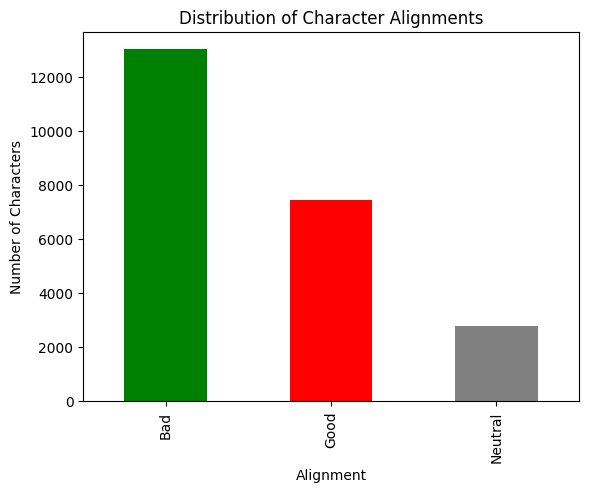

In [49]:
alignment_counts = df['ALIGN'].value_counts()
alignment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Distribution of Character Alignments')
plt.xlabel('Alignment')
plt.ylabel('Number of Characters')
plt.show()

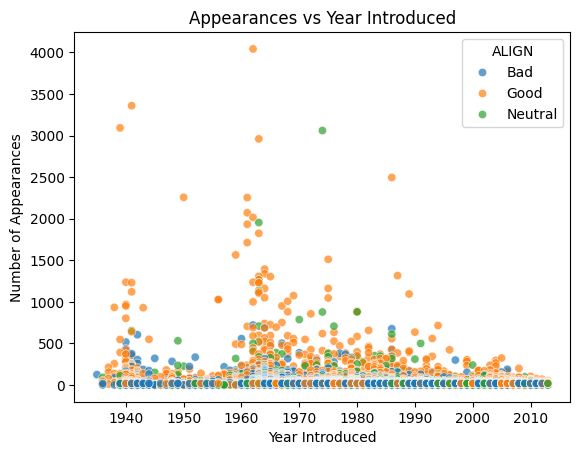

In [57]:
import seaborn as sns

sns.scatterplot(data=df, x='YEAR', y='APPEARANCES', hue='ALIGN', alpha=0.7)
plt.title('Appearances vs Year Introduced')
plt.xlabel('Year Introduced')
plt.ylabel('Number of Appearances')
plt.show()

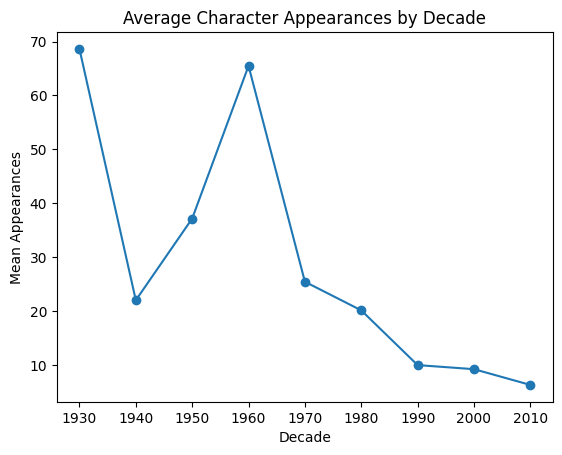

In [ ]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['Decade'] = (df['YEAR']//10)*10
appearances_by_decade = df.groupby('Decade')['APPEARANCES'].mean()
appearances_by_decade.plot(kind='line', marker='o')
plt.title('Average Character Appearances by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Appearances')
plt.show()

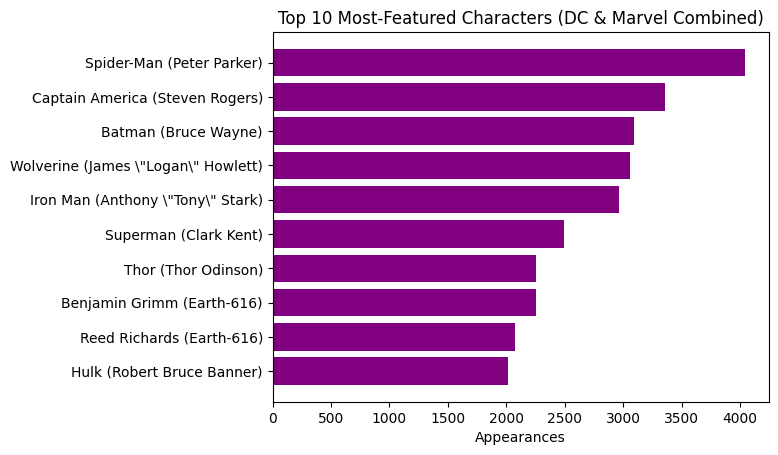

In [54]:
top10 = df.sort_values('APPEARANCES', ascending=False).head(10)
plt.barh(top10['NAME'], top10['APPEARANCES'], color='purple')
plt.title('Top 10 Most-Featured Characters (DC & Marvel Combined)')
plt.xlabel('Appearances')
plt.gca().invert_yaxis()
plt.show()


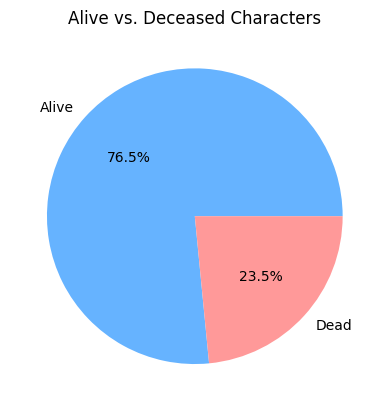

In [55]:
status_counts = df['ALIVE'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Alive vs. Deceased Characters')
plt.ylabel('')
plt.show()

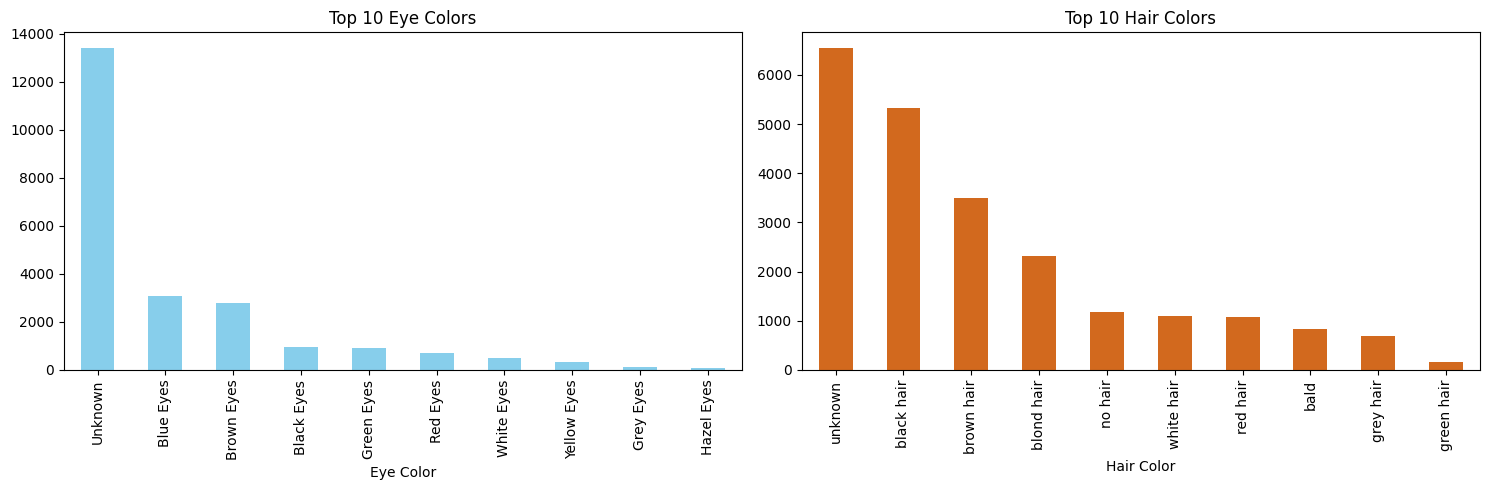

In [56]:
eye_counts = df['EYE'].value_counts().head(10)
hair_counts = df['HAIR'].value_counts().head(10)

fig, axes = plt.subplots(1,2, figsize=(15,5))
eye_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Eye Colors')
axes[0].set_xlabel('Eye Color')

hair_counts.plot(kind='bar', ax=axes[1], color='chocolate')
axes[1].set_title('Top 10 Hair Colors')
axes[1].set_xlabel('Hair Color')

plt.tight_layout()
plt.show()

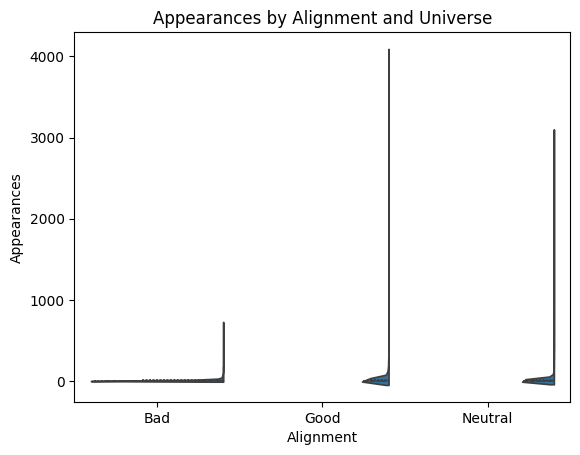

In [66]:
sns.violinplot(data=df, x='ALIGN', y='APPEARANCES', inner="quartile", split=True)
plt.title('Appearances by Alignment and Universe')
plt.xlabel('Alignment')
plt.ylabel('Appearances')
plt.show()

C:\Users\vatsa\AppData\Local\Temp\ipykernel_8120\3945213643.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='ALIGN', columns='SEX', values='NAME', aggfunc='count')


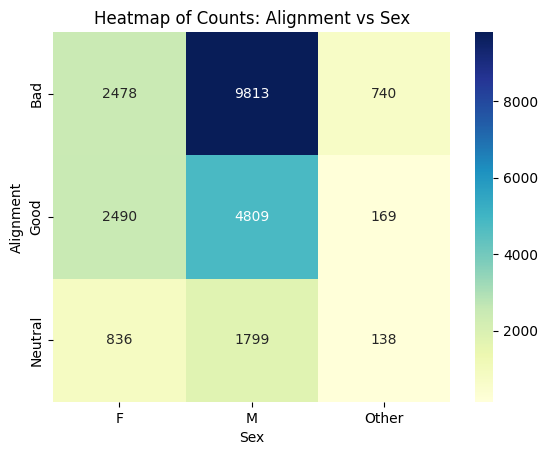

In [60]:
pivot = df.pivot_table(index='ALIGN', columns='SEX', values='NAME', aggfunc='count')
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Counts: Alignment vs Sex')
plt.xlabel('Sex')
plt.ylabel('Alignment')
plt.show()